<a href="https://colab.research.google.com/github/fanroyi/E4511-2021-Fan/blob/main/Curate_and_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Package

In [1]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-04 02:23:08--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   103MB/s    in 5.0s    

2021-04-04 02:23:14 (102 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
   

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m11.377s
user	0m8.539s
sys	0m1.690s
--2021-04-04 02:30:50--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [2]:
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [4]:
! time conda install -c conda-forge -y mordred bravado molvs
! pip install bravado
! pip install molvs
! pip install umap


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m9.794s
user	0m8.381s
sys	0m1.497s
     |████████████████████████████████| 133kB 7.9MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=b4b78d65b16cc95ed2803a3c92dea576e0b2500d078e705a6f2b4a5784aa2a1f
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for molvs: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=5701e6c41d665ddde7ba853c8a8cd815ea76be5231739b74d0c18c7955d31a32
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
Successfully built molvs
  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=172e6e9f6c1d6050fdf6457a88d290732999d9074c34a334b69

In [5]:
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [6]:

from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

# Curation

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
! wget https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/DTC_Curated.csv
! wget https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/EXCAPE_DROP.csv
! wget https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/CHEMBL_curated.csv

--2021-04-04 03:50:43--  https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/DTC_Curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1237 (1.2K) [text/plain]
Saving to: ‘DTC_Curated.csv’

DTC_Curated.csv     100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-04-04 03:50:43 (50.2 MB/s) - ‘DTC_Curated.csv’ saved [1237/1237]

--2021-04-04 03:50:43--  https://raw.githubusercontent.com/fanroyi/E4511-2021-Fan/main/Dataset/EXCAPE_DROP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1091810 (1.

In [12]:
dtc = pd.read_csv('DTC_Curated.csv', header=0, index_col=0)
chembl = pd.read_csv('CHEMBL_curated.csv',header=0, index_col=0)
excape = pd.read_csv('EXCAPE_DROP.csv' ,header = 0, index_col=0)

In [13]:
excape.rename( columns={"pXC50" : "PXC50"}, inplace = True)
excape.rename( columns={"Original_Entry_ID" : "compound_id","Activity_Flag" : "active"}, inplace = True)
excape_ = excape.loc[:,['compound_id','base_rdkit_smiles','PXC50','active']]
excape_.active = excape_.active.map({'A':1, 'N':0})
excape_

,compound_id,base_rdkit_smiles,PXC50,active
59,CHEMBL1402049,NCCSc1nc2ccccc2s1,5.80000,1
103,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,5.68000,1
108,11993875,NCc1ccc(-c2ccccc2)s1,6.30103,1
134,CHEMBL7634,O=C1CCCN1CC#CCN1CCCC1,6.00000,1
164,CHEMBL1416389,O=[N+]([O-])c1c(O)c(Cl)cc(Cl)c1Cl,5.10000,1
...,...,...,...,...
85261,CHEMBL1372952,COc1ccc2[nH]c(Sc3c([N+](=O)[O-])nc(C)n3Cc3cccc...,4.80000,0
85272,CHEMBL1335370,O=C(CSc1ccccc1)Nc1ccc(N2CCN(c3ccccc3)CC2)c(F)c1,6.35000,1
85275,CHEMBL103,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC=C4CC(=O)CC[C@]4(...,5.26000,1
85282,CHEMBL1522767,NC(=NOC(=O)Cc1ccc(-c2ccccc2)cc1)c1cccc([N+](=O...,5.00000,1


In [14]:
chembl.drop('relation',axis=1,inplace=True)
chembl

,compound_id,base_rdkit_smiles,PXC50,active
0,CHEMBL1175,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,4.54,0
1,CHEMBL567911,Cc1c[nH]c2c(Nc3cccc(Cl)c3)ncc(C(=O)N3CCOCC3)c12,5.33,0
2,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,4.99,0
3,CHEMBL2170607,N=C(N)NC(=O)c1ccc(C2CCN(C(=O)C3CC3)CC2)c(C(F)(...,5.22,0
4,CHEMBL2048183,COc1ccc(C(C)=O)cc1CSc1nc2ccccc2n1CC(=O)O,4.62,0
...,...,...,...,...
2053,CHEMBL1269176,OC1C2CC3CC(C2)CC1C3,4.66,0
2054,CHEMBL2207100,O=S(=O)(Nc1cc(Cl)c(Cl)cc1Cn1ccnn1)c1ccc(Cl)s1,5.90,0
2055,CHEMBL252089,CC(C)(c1cc(-c2cccc(-c3cnc4nc[nH]c4c3)c2)c2nccc...,5.54,0
2056,CHEMBL517438,C[C@H]([C@@H](c1ccc(Nc2nc3ccccc3s2)cc1)n1ccnc1...,5.23,0


In [15]:
dtc.drop('relation',axis=1,inplace=True)
dtc.rename( columns={"pXC50" : "PXC50"}, inplace = True)
dtc

,compound_id,base_rdkit_smiles,PXC50,active
0,JOJYHYRCIYAVHN-UHFFFAOYSA-N,Cc1ccc(Sc2ccccc2N2CCNCC2)c(C)c1,4.408935,0
1,CKLPLPZSUQEDRT-WPCRTTGESA-N,C[C@H]1Cc2c([nH]c3cc(Cl)c(F)cc23)[C@@]2(N1)C(=...,5.266001,0
2,HHVBUSGGPUQAOP-UHFFFAOYSA-N,Cc1cccc(Sc2ccccc2N2CCNCC2)c1C,4.397940,0
3,RJOWFEDJGNNCDF-UHFFFAOYSA-N,Clc1ccc(Sc2ccccc2N2CCNCC2)c(Cl)c1,4.468521,0
4,REFJWTPEDVJJIY-UHFFFAOYSA-N,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,4.991400,0
5,XUMDENDMRHWGGR-UHFFFAOYSA-N,Clc1ccc(Sc2ccccc2N2CCNCC2)cc1,4.508638,0
6,VHKBDODTXKHVJR-UHFFFAOYSA-N,Cc1ccc(Sc2ccccc2N2CCNCC2)cc1C,4.468521,0
7,JTQUHGRGBNXQDN-UHFFFAOYSA-N,Clc1cccc(Sc2ccccc2N2CCNCC2)c1Cl,4.397940,0
8,CAVNQHZFZKMWIY-UHFFFAOYSA-N,Cc1ccc(Sc2ccccc2N2CCNCC2)c(Cl)c1,4.397940,0
9,ZQBPXBADOJMCRU-UHFFFAOYSA-N,O=C(O)c1cc(-c2cccc(COc3ccc4c(=O)n(C5CCCC5)sc4c...,5.397940,0


In [16]:
dtc_v =dtc['base_rdkit_smiles'].tolist()
chembl_v =chembl['base_rdkit_smiles'].tolist()
excape_v = excape_['base_rdkit_smiles'].tolist()
from matplotlib_venn import venn3

Text(0.5, 1.0, 'SLC6A3')

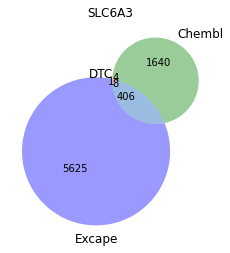

In [17]:
dlst = [set(dtc_v),set(chembl_v), set(excape_v)]

fig = plt.figure()
venn3(dlst, ('DTC', 'Chembl','Excape'))
plt.title('SLC6A3')

In [18]:
comb_df =  pd.concat([dtc,chembl,excape_])
comb_df

,compound_id,base_rdkit_smiles,PXC50,active
0,JOJYHYRCIYAVHN-UHFFFAOYSA-N,Cc1ccc(Sc2ccccc2N2CCNCC2)c(C)c1,4.408935,0
1,CKLPLPZSUQEDRT-WPCRTTGESA-N,C[C@H]1Cc2c([nH]c3cc(Cl)c(F)cc23)[C@@]2(N1)C(=...,5.266001,0
2,HHVBUSGGPUQAOP-UHFFFAOYSA-N,Cc1cccc(Sc2ccccc2N2CCNCC2)c1C,4.397940,0
3,RJOWFEDJGNNCDF-UHFFFAOYSA-N,Clc1ccc(Sc2ccccc2N2CCNCC2)c(Cl)c1,4.468521,0
4,REFJWTPEDVJJIY-UHFFFAOYSA-N,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,4.991400,0
...,...,...,...,...
85261,CHEMBL1372952,COc1ccc2[nH]c(Sc3c([N+](=O)[O-])nc(C)n3Cc3cccc...,4.800000,0
85272,CHEMBL1335370,O=C(CSc1ccccc1)Nc1ccc(N2CCN(c3ccccc3)CC2)c(F)c1,6.350000,1
85275,CHEMBL103,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC=C4CC(=O)CC[C@]4(...,5.260000,1
85282,CHEMBL1522767,NC(=NOC(=O)Cc1ccc(-c2ccccc2)cc1)c1cccc([N+](=O...,5.000000,1


In [19]:

column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (8113, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, PXC50, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (7684, 8)
New column created with averaged values:  VALUE_NUM_mean


Post-processing dataset

Total Number of results = 7684
dataset mean = 5.289595418627912 NM
dataset stdev = 0.714407765880674 NM
dataset max = 9.03 NM
dataset min = 3.4 NM



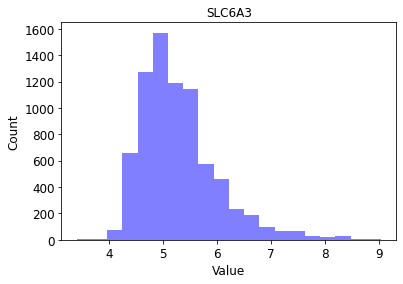

In [20]:
column = 'PXC50'

# # of 'bins' for the histogram
num_bins = 20

title = 'SLC6A3'

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [21]:
curated_df.to_csv('drive/MyDrive/E4511-2021-Fan/curated_combined_df.csv')

In [22]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_chembl = chembl['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_chembl) :
    s1,s2=smiles_dtc,smiles_chembl
else:
    s1,s2=smiles_chembl,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

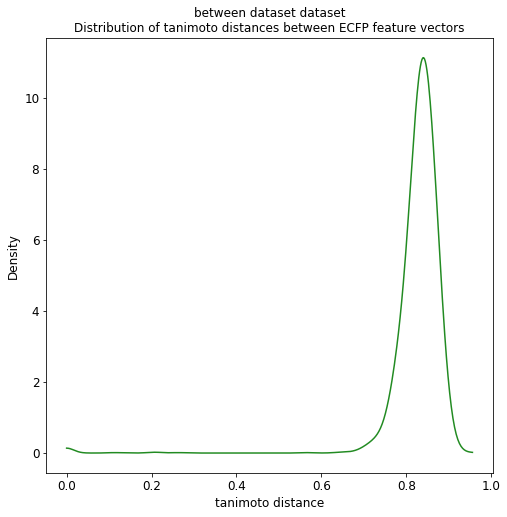

In [23]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [24]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['base_rdkit_smiles'].tolist()

smiles_dtc = dtc['base_rdkit_smiles'].tolist()
smiles_excape = excape_['base_rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_dtc) > len(smiles_excape) :
    s1,s2=smiles_dtc,smiles_excape
else:
    s1,s2=smiles_excape,smiles_dtc
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

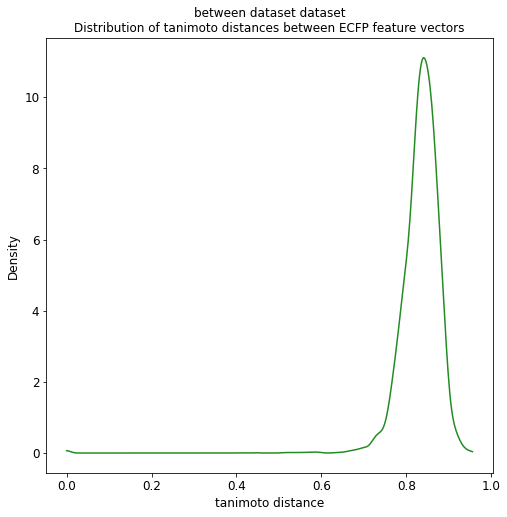

In [25]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')